In [2]:
pip install pyserial

  Using cached pyserial-3.5-py2.py3-none-any.whl.metadata (1.6 kB)
Using cached pyserial-3.5-py2.py3-none-any.whl (90 kB)

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(720, 1280, 3)


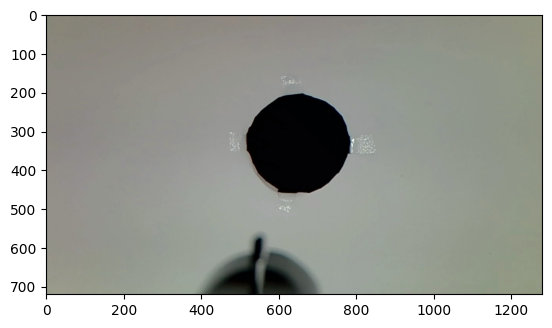

In [92]:
img_path = "../foto_center.jpg"
angle = 90
diff_y_list = []

img = cv2.imread(img_path)
N, M = img.shape[:2]
print(img.shape)

plt.imshow(img)
plt.show()

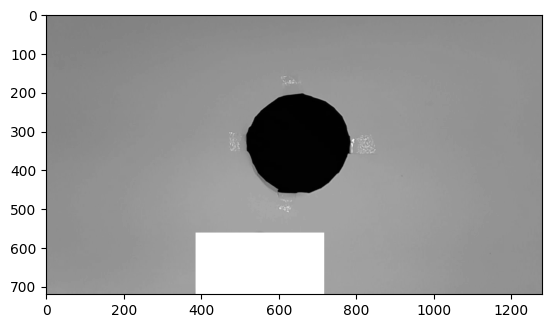

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
centerM = int(M/2)-88
gunN, gunM = int(N*0.22), int(M*0.13)
gray[-gunN:, centerM-gunM:centerM+gunM] = 255

plt.imshow(gray, cmap='gray')
plt.show()

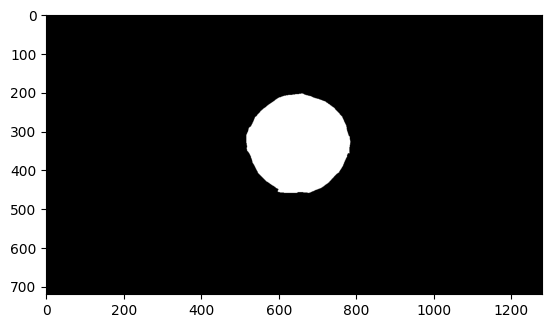

(720, 1280)
max: 1
min: 0


In [94]:
binary = (gray < 50).astype(np.uint8)

plt.imshow(binary, cmap='gray')
plt.show()

print(binary.shape)
print('max:', segment.max())
print('min:', segment.min())

Detected by: contour. Center = (650, 333), radius = 135


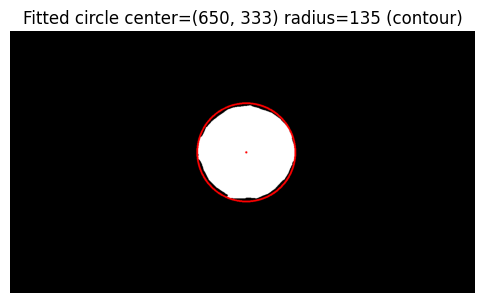

In [95]:
contours, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

detected = False

if contours:
    # pick the largest contour (assumes the circle blob is the largest)
    largest = max(contours, key=cv2.contourArea)
    (x, y), radius = cv2.minEnclosingCircle(largest)
    center = (int(round(x)), int(round(y)))
    radius = int(round(radius))
    detected = True
    method = 'contour'
else:
    # fallback 2) HoughCircles (works on blurred grayscale)
    # convert to proper gray image if needed
    blur = cv2.GaussianBlur(binary, (9, 9), 2)
    # Hough expects edges/gray in range 0-255, dtype uint8
    circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                               param1=50, param2=30, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        # choose the circle with the largest radius (or pick [0] if you expect one)
        best = max(circles, key=lambda c: c[2])
        center = (int(best[0]), int(best[1]))
        radius = int(best[2])
        detected = True
        method = 'hough'

if not detected:
    raise RuntimeError("No circle-like object detected with contours or HoughCircles. "
                       "Check your binary image (0/255, single blob).")

print(f"Detected by: {method}. Center = {center}, radius = {radius}")

binary255 = binary*255

# Prepare a color image for drawing (use original if you have `orig_img`)
if len(binary255.shape) == 2:
    color = cv2.cvtColor(binary255, cv2.COLOR_GRAY2BGR)
else:
    # if somehow already 3-channel, copy it
    color = binary255.copy()

# Draw the circle and center in red (BGR)
cv2.circle(color, center, radius, (0, 0, 255), 4)   # circle outline
cv2.circle(color, center, 3, (0, 0, 255), -1)       # center dot

# Convert BGR -> RGB for matplotlib
color_rgb = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(color_rgb)
plt.axis('off')
plt.title(f'Fitted circle center={center} radius={radius} ({method})')
plt.show()

In [96]:
img_center = M//2, N//2
circle_center = center

print(img_center)
print(circle_center)

diff_y = img_center[1] - circle_center[1]
diff_x = img_center[0] - circle_center[0]

print('x:', diff_x)
print('y:', diff_y)

(640, 360)
(650, 333)
x: -10
y: 27


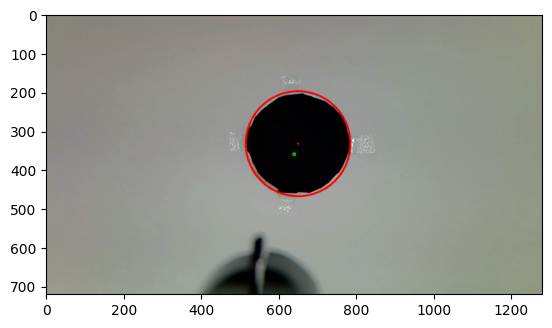

In [97]:
img_copy = img.copy()

cv2.circle(img_copy, center, radius, (255, 0, 0), 4)   # circle outline
cv2.circle(img_copy, center, 3, (255, 0, 0), -1)       # center dot
cv2.circle(img_copy, img_center, 3, (0, 255, 0), 2)       # center dot

plt.imshow(img_copy)
plt.show()

In [98]:
diff_y_list.append([angle, diff_y])

diff_y_list

[[90, 27]]